In [52]:
#important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.cluster import DBSCAN

In [2]:
# df = pd.read_excel('EastWestAirlines.xlsx')  sheet one  for understanding the description which is defualt sheet 


In [3]:
df = pd.read_excel('EastWestAirlines.xlsx', sheet_name = 'data') # sheet 2 with main ingredients

In [4]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [5]:
df.head(5)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [6]:
df.tail(5)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0
3998,4021,3016,0,1,1,1,0,0,0,0,1398,0


In [7]:
df.shape

(3999, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [9]:
df['ID#'].unique() #i guess some id's are missiong the total rows are 4k but id's are 4021

array([   1,    2,    3, ..., 4019, 4020, 4021], shape=(3999,))

In [10]:

# Assume 'ID' column contains the IDs
ids = df['ID#']

# Find expected full range of IDs
full_range = set(range(ids.min(), ids.max() + 1))

# Find missing IDs
missing_ids = sorted(full_range - set(ids))

print("Missing IDs:", missing_ids)

Missing IDs: [70, 77, 185, 336, 392, 561, 598, 624, 674, 849, 1091, 1212, 1391, 1487, 1639, 1805, 2226, 2419, 2639, 2716, 2718, 3259]


In [11]:
df['Balance'] # Number of miles eligible for award travel

0       28143
1       19244
2       41354
3       14776
4       97752
        ...  
3994    18476
3995    64385
3996    73597
3997    54899
3998     3016
Name: Balance, Length: 3999, dtype: int64

In [12]:
df['cc1_miles'].value_counts() # 1 = under 5000 , 2 = 5k -10k , 3 = 10001 to 25k , 4 = 25001 to 50k , 5 = over 50k
# Number of miles earned with freq. flyer credit card in the past 12 months: cc1_miles

cc1_miles
1    2289
3     613
4     525
5     288
2     284
Name: count, dtype: int64

In [13]:
df['cc2_miles'].value_counts() # Number of miles earned with Rewards credit card in the past 12 months

cc2_miles
1    3956
2      28
3      15
Name: count, dtype: int64

In [14]:
df['cc3_miles'].value_counts() # Number of miles earned with Small Business credit card in the past 12 months: 

cc3_miles
1    3981
4       6
5       5
3       4
2       3
Name: count, dtype: int64

In [15]:
df['Bonus_miles'] # Number of miles earned from non-flight bonus transactions in the past 12 months = miles bonus on transactions

0         174
1         215
2        4123
3         500
4       43300
        ...  
3994     8525
3995      981
3996    25447
3997      500
3998        0
Name: Bonus_miles, Length: 3999, dtype: int64

In [16]:
df['Bonus_trans'] #Number of non-flight bonus transactions in the past 12 months = regular customer bonus respective of flight booking transactions

0        1
1        2
2        4
3        1
4       26
        ..
3994     4
3995     5
3996     8
3997     1
3998     0
Name: Bonus_trans, Length: 3999, dtype: int64

In [17]:
df['Flight_miles_12mo'] # Number of flight miles in the past 12 months = how many miles the customer travel in last 12 month 

0          0
1          0
2          0
3          0
4       2077
        ... 
3994     200
3995       0
3996       0
3997     500
3998       0
Name: Flight_miles_12mo, Length: 3999, dtype: int64

In [18]:
df['Flight_trans_12'] # Number of flight Transcations in the past 12 months = total flight booking last 12 month

0       0
1       0
2       0
3       0
4       4
       ..
3994    1
3995    0
3996    0
3997    1
3998    0
Name: Flight_trans_12, Length: 3999, dtype: int64

In [19]:
df['Days_since_enroll'] # Number of days since Enroll_date = Tells for how many days the customer is conndected with airline

0       7000
1       6968
2       7034
3       6952
4       6935
        ... 
3994    1403
3995    1395
3996    1402
3997    1401
3998    1398
Name: Days_since_enroll, Length: 3999, dtype: int64

In [20]:
df['Award?'] # Dummy variable for Last_award (1=not null, 0=null)

0       0
1       0
2       0
3       0
4       1
       ..
3994    1
3995    1
3996    1
3997    0
3998    0
Name: Award?, Length: 3999, dtype: int64

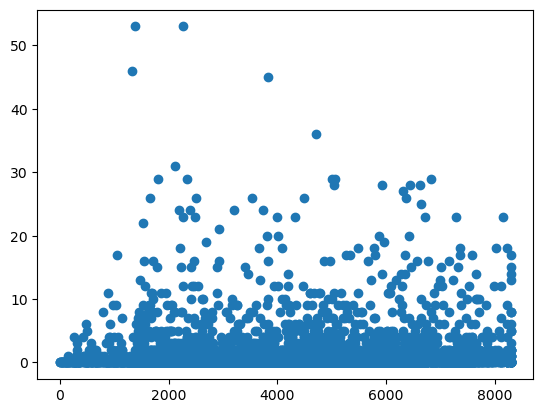

In [21]:
plt.scatter(df['Days_since_enroll'], df['Flight_trans_12'])

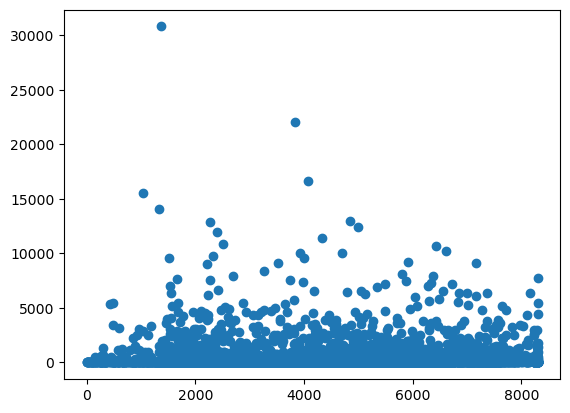

In [22]:
plt.scatter(df['Days_since_enroll'], df['Flight_miles_12mo'])

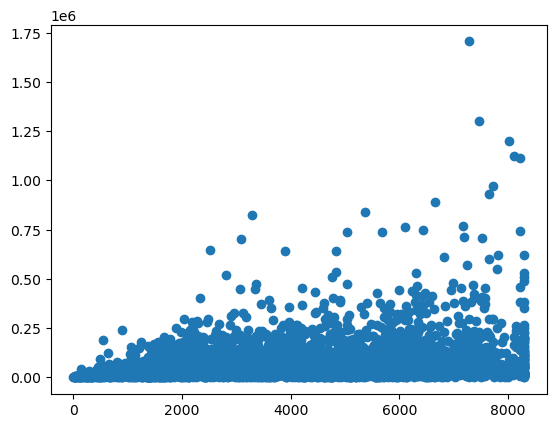

In [23]:
plt.scatter(df['Days_since_enroll'], df['Balance'])

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [25]:
feature = df[['Balance','Bonus_miles', 'Flight_miles_12mo','Days_since_enroll']]

In [26]:
scaler = StandardScaler()
X = scaler.fit_transform(feature)

In [27]:
WCSS = [] # Within-Cluster Sum of Squares

for k in range(1,11):
    kmeans = KMeans(n_clusters = k , random_state = 42 , n_init = 10)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)

In [28]:
WCSS

[15996.000000000007,
 12008.405958100911,
 9606.189596184462,
 7708.136505263746,
 6470.712724844006,
 5862.807399695908,
 5369.496340921788,
 4865.39270448332,
 4424.274168838151,
 4115.965206949336]

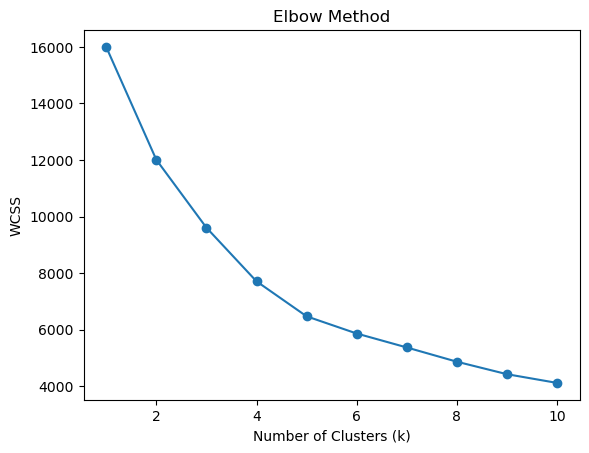

In [29]:
plt.plot(range(1, 11), WCSS, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [30]:
X = df.iloc[:,:].values
X

array([[    1, 28143,     0, ...,     0,  7000,     0],
       [    2, 19244,     0, ...,     0,  6968,     0],
       [    3, 41354,     0, ...,     0,  7034,     0],
       ...,
       [ 4019, 73597,     0, ...,     0,  1402,     1],
       [ 4020, 54899,     0, ...,     1,  1401,     0],
       [ 4021,  3016,     0, ...,     0,  1398,     0]], shape=(3999, 12))

In [31]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
y_means = kmeans.fit_predict(X)

In [32]:
y_means

array([0, 0, 0, ..., 2, 0, 0], shape=(3999,), dtype=int32)

In [33]:
X[y_means == 3,1]

array([ 969559,  930410,  707079, 1302051, 1704838,  714717,  766419,
       1113394,  743745, 1125076, 1199220,  889456,  747983,  765738,
        739476,  837979,  737514,  704113,  822321])

In [34]:
X[y_means == 2,1]

array([ 97752,  84914, 104860, ...,  72297,  59017,  73597], shape=(1055,))

In [35]:
X[y_means == 2,0]

array([   5,    7,   10, ..., 3996, 4008, 4019], shape=(1055,))

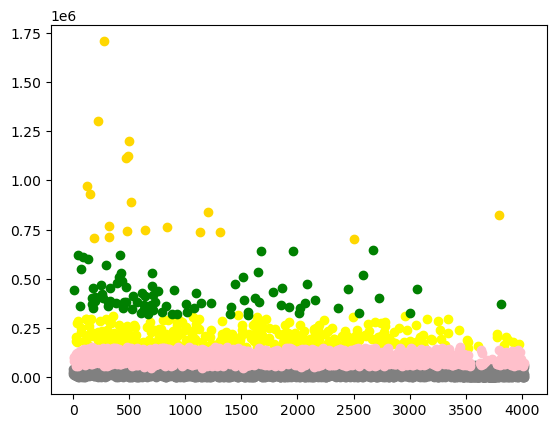

In [36]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1], color='grey')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1], color='yellow')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1], color='pink')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1], color='gold')
plt.scatter(X[y_means == 4,0],X[y_means == 4,1], color='green')

In [37]:
print(f"{len(X[y_means == 2,0]),
len(X[y_means == 3,0]),
len(X[y_means == 4,0]),
len(X[y_means == 1,0]),
len(X[y_means == 0,0])}")



(1055, 19, 88, 344, 2493)


In [38]:
1055 + 19 + 88  + 344 + 2493

3999

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering  #cluster algo which bottom-up approach - agglomerative 
from scipy.cluster.hierarchy import dendrogram, linkage #dendogram provide graphical representation of data points and their relation with eachother

clustering = AgglomerativeClustering(n_clusters=3) #setting agglomertaive approach with no. of cluster 3
labels = clustering.fit_predict(X)  #label all clusters like 0,1,2



In [40]:
agg = AgglomerativeClustering(distance_threshold=0, n_clusters=None) #perform agglo till you  reach distance = 0 make all points getting merged
# with n no. of cluster getting performed for dendogram representation
agg.fit(X) #fit


AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [41]:
agg.children_ # how data points are merged 

array([[3565, 3581],
       [3827, 3845],
       [3724, 3730],
       ...,
       [7987, 7991],
       [7992, 7993],
       [7994, 7995]], shape=(3998, 2))

In [42]:
def plot_dendrogram(model, **kwargs):   # model = agg and **kwargs is for extra customizes in our dendogram represent (truncate_mode , labels , orienataion)
    counts = np.zeros(model.children_.shape[0]) 
    # array counts filled with zeros, to store the number of original samples contained in each non-leaf cluster formed during merging.
    # model.children_ is an array of shape (n_samples-1, 2) that records which clusters got merged at each step.
    # model.children_.shape[0] = number of merges = n_samples - 1.
    n_samples = len(model.labels_)
    


# i = index of current merge (0 … n_samples-2).
# merge = two child cluster indices that got merged at this step.
    for i, merge in enumerate(model.children_):
        current_count = 0
        # If child_idx < n_samples → it’s a leaf node (an original sample), so we add 1.
        # Else → it’s a non-leaf cluster (already merged earlier). Those clusters are stored starting after the sample indices, so we subtract n_samples to look up its size in counts.
        # current_count accumulates the total number of original samples inside this merged cluster.
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

# np.column_stack([...]) combines:
# model.children_ → the two children merged at each step.
# model.distances_ → the distance between those two clusters when merging.
# counts → the number of original samples in the newly formed cluster.
# .astype(float) ensures the data is in float format (as required).
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs) 
# linkage_matrix provide merge history and customize (like orientation, truncation, labels, color thresholds, etc.).
    

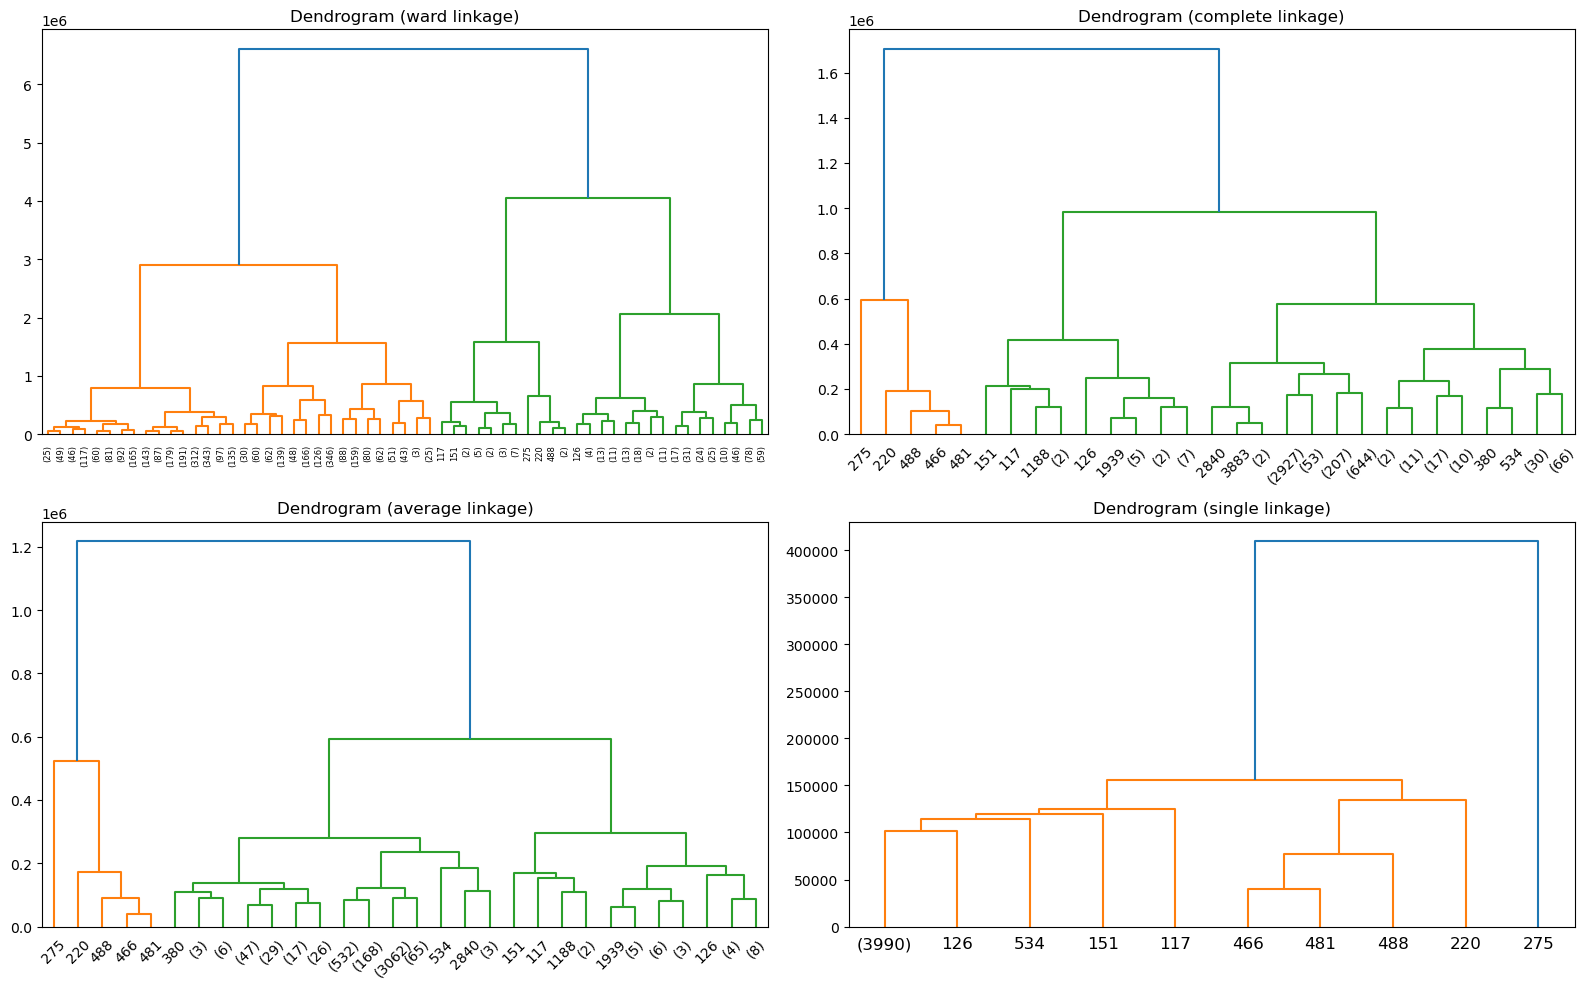

In [43]:
linkages = ["ward", "complete", "average", "single"]

plt.figure(figsize=(16, 10))

for i, method in enumerate(linkages, 1):
    model = AgglomerativeClustering(
        n_clusters=None,  # keep merging until single cluster
        distance_threshold=0,  
        linkage=method
    )
    model.fit(X)

    plt.subplot(2, 2, i)
    plot_dendrogram(
        model,
        truncate_mode="level",  # show only top merges
        p=5,                    # number of levels
        orientation="top"
    )
    plt.title(f"Dendrogram ({method} linkage)")

plt.tight_layout()
plt.show()

In [44]:
counts = np.zeros(agg.children_.shape[0]) #just for understanding
n_samples = len(agg.labels_)
print(counts, n_samples)

[0. 0. 0. ... 0. 0. 0.] 3999


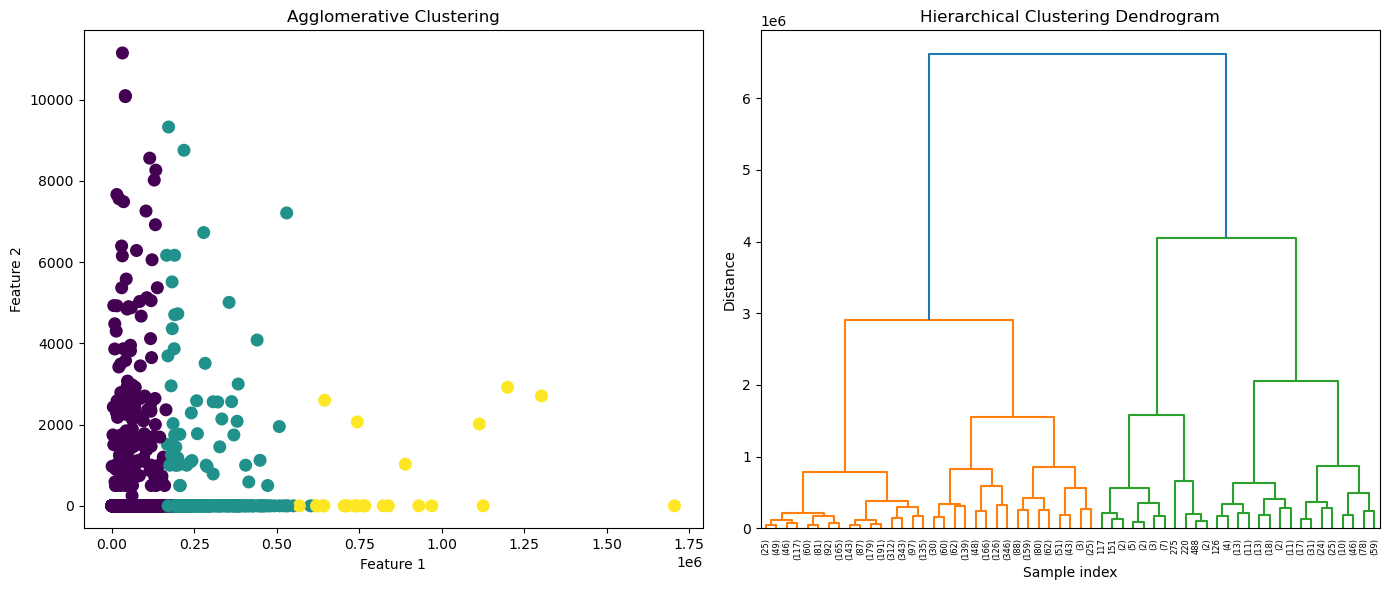

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.scatter(X[:, 1], X[:, 2], c=labels, cmap='viridis', s=70)
ax1.set_title("Agglomerative Clustering")
ax1.set_xlabel("Feature 1")
ax1.set_ylabel("Feature 2")

plt.sca(ax2)
plot_dendrogram(agg, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")

plt.tight_layout()
plt.show()

Divisive cluster sizes:
DivisiveCluster
3    2663
1    1302
4      34
Name: count, dtype: int64


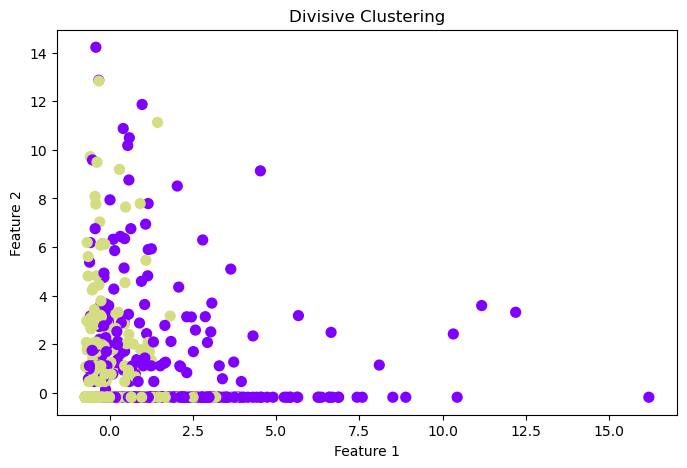

In [46]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 2. Keep only numeric columns and drop ID#
X = df.drop(columns=["ID#"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Divisive clustering function
def divisive_clustering(X, n_clusters=3):
    clusters = {0: np.arange(len(X))}  # start with all indices
    labels = np.zeros(len(X), dtype=int)
    next_cluster_id = 1

    while len(clusters) < n_clusters:
        # pick largest cluster
        largest_cluster = max(clusters.items(), key=lambda x: len(x[1]))[0]
        indices = clusters.pop(largest_cluster)
        points = X[indices]

        # split into 2 clusters
        kmeans = KMeans(n_clusters=2, random_state=42, n_init=10).fit(points)
        left_indices = indices[kmeans.labels_ == 0]
        right_indices = indices[kmeans.labels_ == 1]

        # assign labels
        labels[left_indices] = next_cluster_id
        labels[right_indices] = next_cluster_id + 1

        # add new clusters
        clusters[next_cluster_id] = left_indices
        clusters[next_cluster_id + 1] = right_indices
        next_cluster_id += 2

    return labels

# 4. Apply divisive clustering
labels_div = divisive_clustering(X_scaled, n_clusters=3)
df["DivisiveCluster"] = labels_div

# 5. Cluster sizes
print("Divisive cluster sizes:")
print(df["DivisiveCluster"].value_counts())

# 6. Optional: 2D visualization using first two features
plt.figure(figsize=(8,5))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels_div, cmap='rainbow', s=50)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Divisive Clustering")
plt.show()


In [47]:
# DBSCAN - Density-Based Spatial Clustering of Applications with Noise

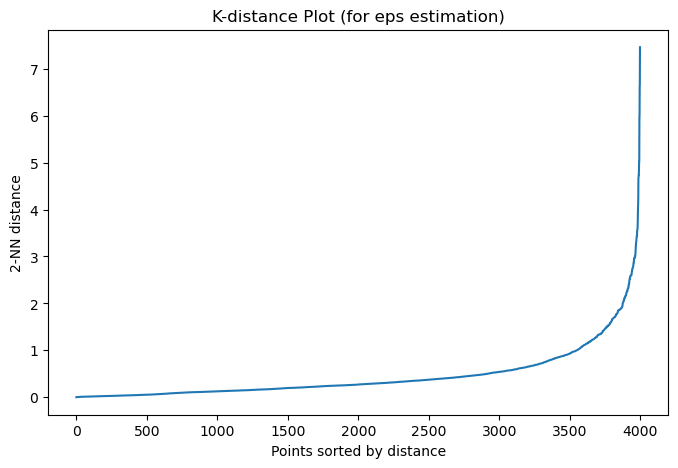

In [48]:
from sklearn.neighbors import NearestNeighbors

k = 2   # usually = min_samples - 1
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Take the k-th nearest distance
k_distances = np.sort(distances[:, k-1])

plt.figure(figsize=(8,5))
plt.plot(k_distances)
plt.xlabel("Points sorted by distance")
plt.ylabel(f"{k}-NN distance")
plt.title("K-distance Plot (for eps estimation)")
plt.show()


In [53]:
dbscan = DBSCAN(eps=1.5, min_samples=10) # best eps value range from 0.8 to 2
labels_db = dbscan.fit_predict(X_scaled)
df["DBSCAN_Cluster"] = labels_db
print("DBSCAN cluster sizes:")
print(df["DBSCAN_Cluster"].value_counts())


DBSCAN cluster sizes:
DBSCAN_Cluster
 0    2396
 1    1211
-1     377
 2      15
Name: count, dtype: int64


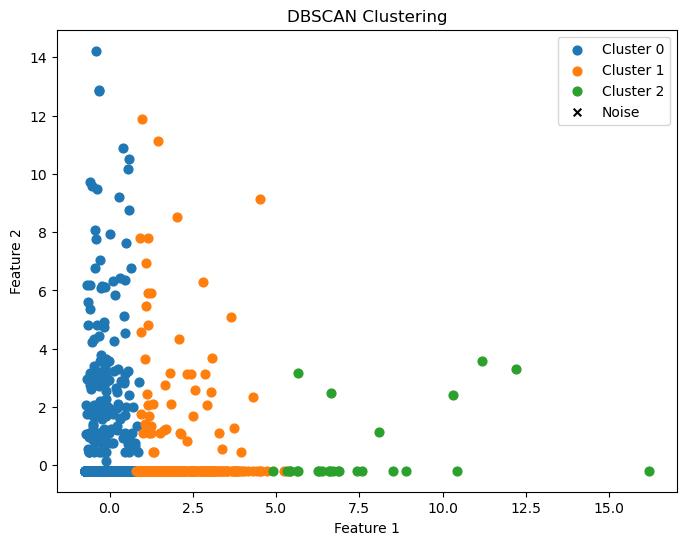

In [54]:

# Plot clusters
plt.figure(figsize=(8,6))

# Unique cluster labels (-1 = noise)
unique_labels = set(labels_db)

for label in unique_labels:
    if label == -1:
        # Noise points
        color = "black"
        plt.scatter(X_scaled[labels == label, 0], 
                    X_scaled[labels == label, 1], 
                    c=color, s=30, marker="x", label="Noise")
    else:
        # Clustered points
        plt.scatter(X_scaled[labels == label, 0], 
                    X_scaled[labels == label, 1], 
                    s=40, label=f"Cluster {label}")

plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()